# 图像阈值

### 目标

- 在本教程中，您将学习简单阈值，自适应阈值和Otsu阈值。
- 你将学习函数**cv.threshold**和**cv.adaptiveThreshold**。

### 简单阈值

在这里，问题直截了当。对于每个像素，应用相同的阈值。如果像素值小于阈值，则将其设置为0，否则将其设置为最大值。函数**cv.threshold**用于应用阈值。第一个参数是源图像，它**应该是灰度图像**。第二个参数是阈值，用于对像素值进行分类。第三个参数是分配给超过阈值的像素值的最大值。OpenCV提供了不同类型的阈值，这由函数的第四个参数给出。通过使用**cv.THRESH_BINARY**类型。所有简单的阈值类型为：

- **cv.THRESH_BINARY**
- **cv.THRESH_BINARY_INV**
- **cv.THRESH_TRUNC**
- **cv.THRESH_TOZERO**
- **cv.THRESH_TOZERO_INV**

请通过类型的文档来观察区别。

该方法返回两个输出。第一个是使用的阈值，第二个输出是**阈值后的图像**。

此代码比较了不同的简单阈值类型：

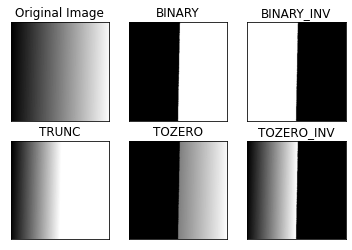

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('data/gradient.png',0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

> **注意**
  为了绘制多个图像，我们使用`plt.subplot()`函数。请查看matplotlib文档以获取更多详细信息。

### 自适应阈值

在上一节中，我们使用一个全局值作为阈值。但这可能并非在所有情况下都很好，例如，如果图像在不同区域具有不同的光照条件。在这种情况下，自适应阈值阈值化可以提供帮助。在此，算法基于像素周围的小区域确定像素的阈值。因此，对于同一图像的不同区域，我们获得了不同的阈值，这为光照度变化的图像提供了更好的结果。

除上述参数外，方法**cv.adaptiveThreshold**还包含三个输入参数：

该**adaptiveMethod**决定阈值是如何计算的：

**cv.ADAPTIVE_THRESH_MEAN_C:**:阈值是邻近区域的平均值减去常数**C**。

**cv.ADAPTIVE_THRESH_GAUSSIAN_C**:阈值是邻域值的高斯加权总和减去常数**C**。

该**BLOCKSIZE**确定附近区域的大小，**C**是从邻域像素的平均或加权总和中减去的一个常数。

下面的代码比较了光照变化的图像的全局阈值和自适应阈值：

结果：

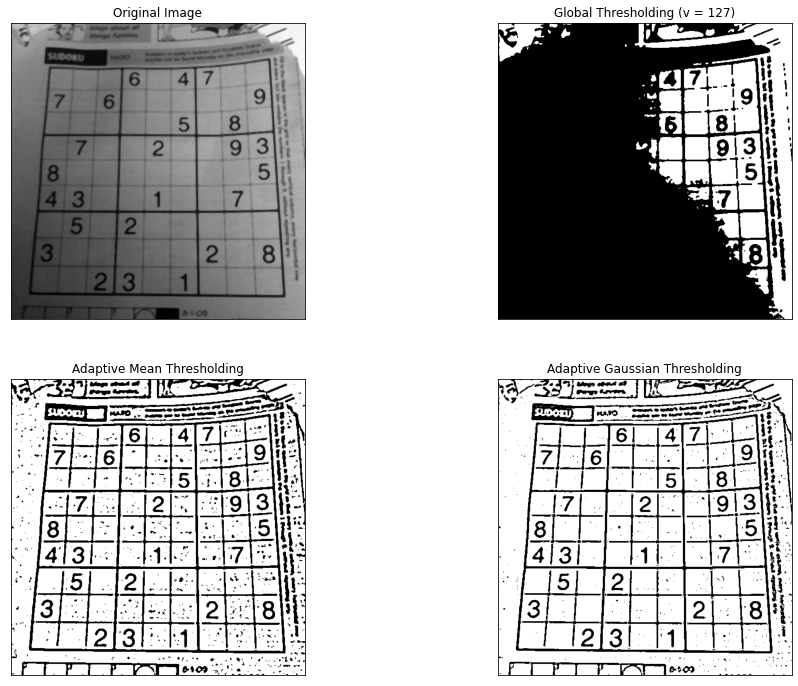

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('data/sudoku.png', cv.IMREAD_GRAYSCALE)

assert img is not None, "file could not be read, check with os.path.exists()"

img = cv.medianBlur(img,5)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(16, 12))

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

### Otsu的二值化

在全局阈值化中，我们使用任意选择的值作为阈值。相反，Otsu的方法避免了必须选择一个值并自动确定它的情况。

考虑仅具有两个不同图像值的图像（*双峰图像*），其中直方图将仅包含两个峰。一个好的阈值应该在这两个值的中间。类似地，Otsu的方法从图像直方图中确定最佳全局阈值。

为此，使用了**cv.threshold**作为附加标志传递。阈值可以任意选择。然后，算法找到最佳阈值，该阈值作为第一输出返回。

查看以下示例。输入图像为噪点图像。在第一种情况下，采用值为127的全局阈值。在第二种情况下，直接采用Otsu阈值法。在第三种情况下，首先使用5x5高斯核对图像进行滤波以去除噪声，然后应用Otsu阈值处理。了解噪声滤波如何改善结果。

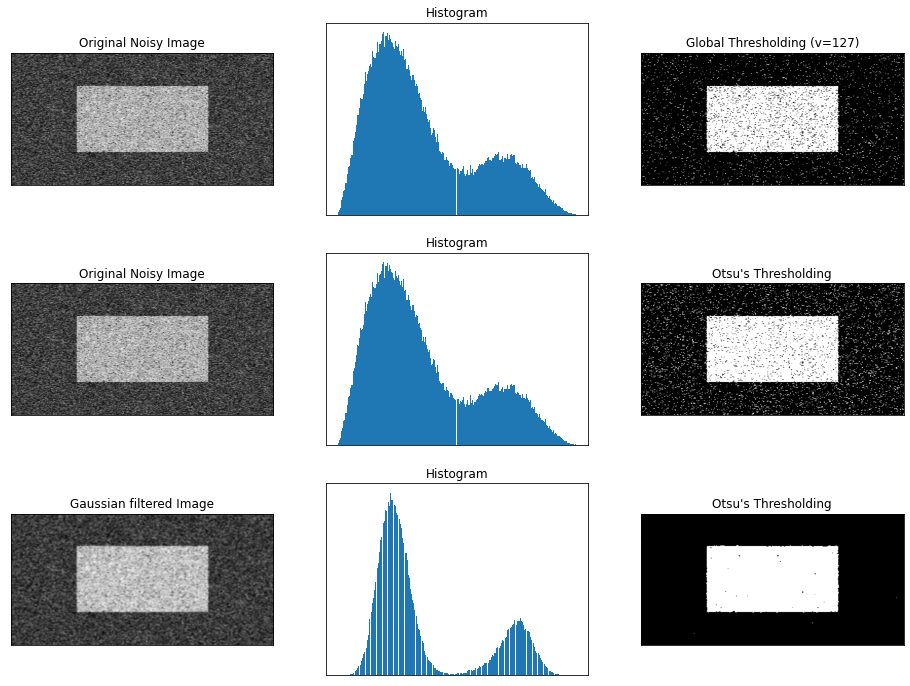

In [3]:
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('data/noisy2.png',0)

# 全局阈值
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# Otsu阈值
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# 高斯滤波后再采用Otsu阈值
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# 绘制所有图像及其直方图
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(figsize=(16, 12))

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

plt.show()

#### Otsu的二值化如何实现？

本节演示了Otsu二值化的Python实现，以展示其实际工作方式。如果您不感兴趣，可以跳过此步骤。

由于我们正在处理双峰图像，因此Otsu的算法尝试找到一个阈值(t)，该阈值将由关系式给出的**加权类内方差**最小化：

$$
\sigma_w^2(t) = q_1(t)\sigma_1^2(t)+q_2(t)\sigma_2^2(t)
$$

其中

$$
q_1(t) = \sum_{i=1}^{t} P(i) \quad \& \quad q_2(t) = \sum_{i=t+1}^{I} P(i)
$$

$$
\mu_1(t) = \sum_{i=1}^{t} \frac{iP(i)}{q_1(t)} \quad \& \quad \mu_2(t) = \sum_{i=t+1}^{I} \frac{iP(i)}{q_2(t)}
$$

$$
\sigma_1^2(t) = \sum_{i=1}^{t} [i-\mu_1(t)]^2 \frac{P(i)}{q_1(t)} \quad \& \quad \sigma_2^2(t) = \sum_{i=t+1}^{I} [i-\mu_2(t)]^2 \frac{P(i)}{q_2(t)}
$$

实际上，它找到位于两个峰值之间的t值，以使两个类别的差异最小。它可以简单地在Python中实现，如下所示：

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('data/noisy2.png', cv.IMREAD_GRAYSCALE)

assert img is not None, "file could not be read, check with os.path.exists()"

blur = cv.GaussianBlur(img, (5, 5), 0)

# 寻找归一化直方图和对应的累积分布函数
hist = cv.calcHist([blur], [0], None, [256], [0, 256])
hist_norm = hist.ravel() / hist.sum()
Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1

for i in range(1, 256):
    p1, p2 = np.hsplit(hist_norm, [i])  # 概率
    q1, q2 = Q[i], Q[255] - Q[i]  # 对类求和
    if q1 < 1.e-6 or q2 < 1.e-6:
        continue
    b1, b2 = np.hsplit(bins, [i])  # 权重

    # 寻找均值和方差
    m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
    v1, v2 = np.sum(((b1 - m1)**2) * p1) / q1, np.sum(((b2 - m2)**2) * p2) / q2

    # 计算最小化函数
    fn = v1 * q1 + v2 * q2
    if fn < fn_min:
        fn_min = fn
        thresh = i

# 使用OpenCV函数找到otsu的阈值
ret, otsu = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print("{} {}".format(thresh, ret))

118 117.0


### 其他资源

1. Digital Image Processing, Rafael C. Gonzalez

### 练习题

1. Otsu的二值化有一些优化。您可以搜索并实现它。